In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("./app/TrainedModel/BostonHousing.csv")
df_X = boston.drop(['medv'], axis=1)
df_y = boston['medv']

boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [2]:
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# import seaborn as sns
# sns.set_theme(style="ticks")
# rc = {'figure.figsize':(20,20),
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.9',
#       'grid.linestyle':'-.',
#       'font.family':'Times New Roman',
#       'font.size' : 15}
# plt.rcParams.update(rc)
# # df = sns.load_dataset("penguins")
# sns.pairplot(bos_df, hue="PRICE")
# plt.savefig('app/static/pairplot_dataframe.jpg',dpi=300)

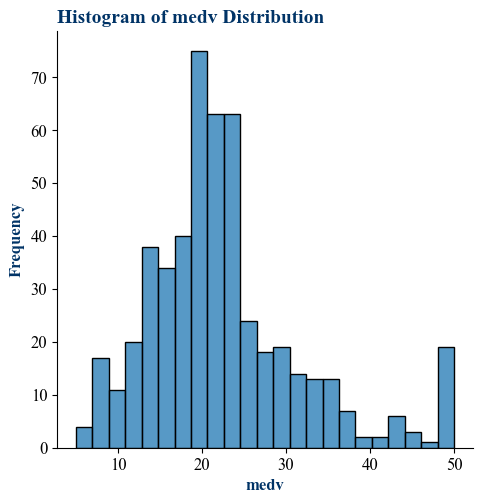

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'figure.figsize':(10,6),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '#c9c9c9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 12}
plt.rcParams.update(rc)
sns.displot(boston['medv'])
plt.title("Histogram of medv Distribution", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("medv", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')
plt.savefig('./app/static/medv_distribution.jpg',dpi=300)

In [6]:
# from itertools import combinations
# number_of_variables = 4
# for columns_names in combinations(bos_df.columns, number_of_variables):
#     sns.pairplot(boston, vars=[columns_names],hue="medv",)

# import matplotlib.pyplot as plt
# import seaborn as sns
# rc = {'figure.figsize':(20,20),
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.9',
#       'grid.linestyle':'-.',
#       'font.family':'Times New Roman',
#       'font.size' : 15}
# plt.rcParams.update(rc)
# # sns.distplot(boston['medv'])
# # plt.title("Histogram of medv Distribution", loc='left', fontsize=14,fontweight='bold',color='#003366')
# # plt.xlabel("medv", fontsize=12,fontweight='bold',color='#003366')
# # plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')

# from itertools import combinations
# number_of_variables = 4
# for c in combinations(boston.columns, number_of_variables):
#     sns.pairplot(boston, vars=c,hue="medv")
#     filename='_'.join(c)
#     plt.savefig('app/static/plot4/'+filename+'.jpg',dpi=300)
#     plt.close()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.15)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train)

print('labels\n', boston.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
Coefficients: 
 [-1.20538788e-01  4.88522832e-02 -3.82179419e-02  2.58889847e+00
 -1.45092524e+01  4.06695579e+00 -1.64187290e-02 -1.44566631e+00
  2.90169819e-01 -1.33163539e-02 -8.38231469e-01  9.67255032e-03
 -3.97371498e-01]
Intercept: 
 31.284556866519857
R2 for Train) 0.7520298226063064
R2 for Test (cross validation) 0.6628487561645711


In [9]:
# import sklearn.metrics as metrics
# def regression_results(y_true, y_pred):

#     # Regression metrics
#     explained_variance=metrics.explained_variance_score(y_true, y_pred)
#     mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
#     mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
#     median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
#     r2=metrics.r2_score(y_true, y_pred)

#     print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
#     print('r2: ', round(r2,4))
#     print('MAE: ', round(mean_absolute_error,4))
#     print('MSE: ', round(mse,4))
#     print('RMSE: ', round(np.sqrt(mse),4))

# regression_results(y_test, lm.predict(X_test))

# coef_list = pd.DataFrame( list(zip(boston.columns, lm.coef_)),
#             columns=['features', 'estimatedCoeffs']).T
# coef_list

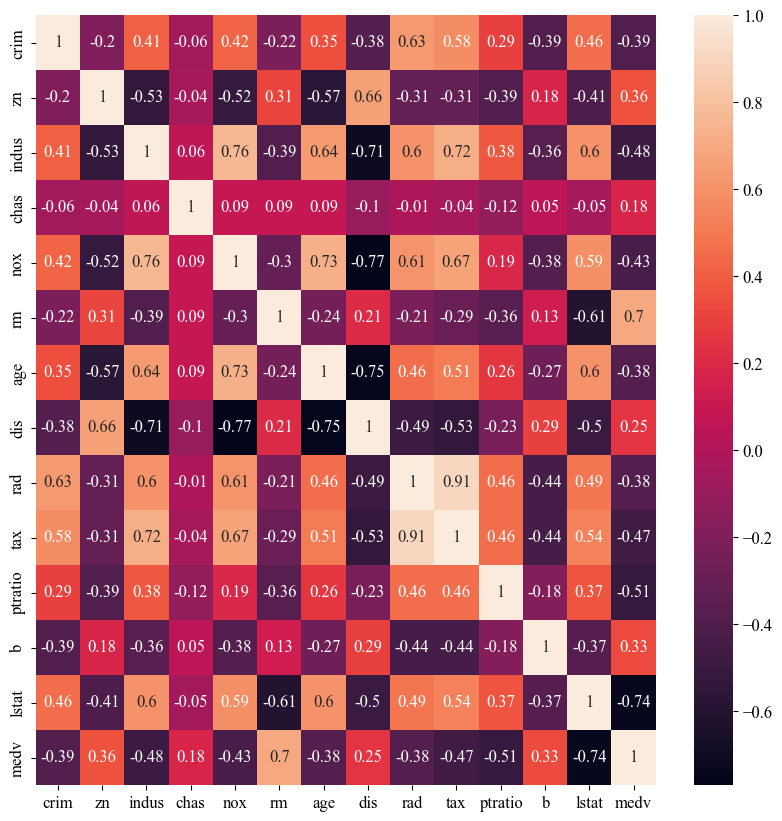

In [10]:
plt.figure(figsize=(10, 10))
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('app/static/heatmap_allvar.jpg',dpi=300)

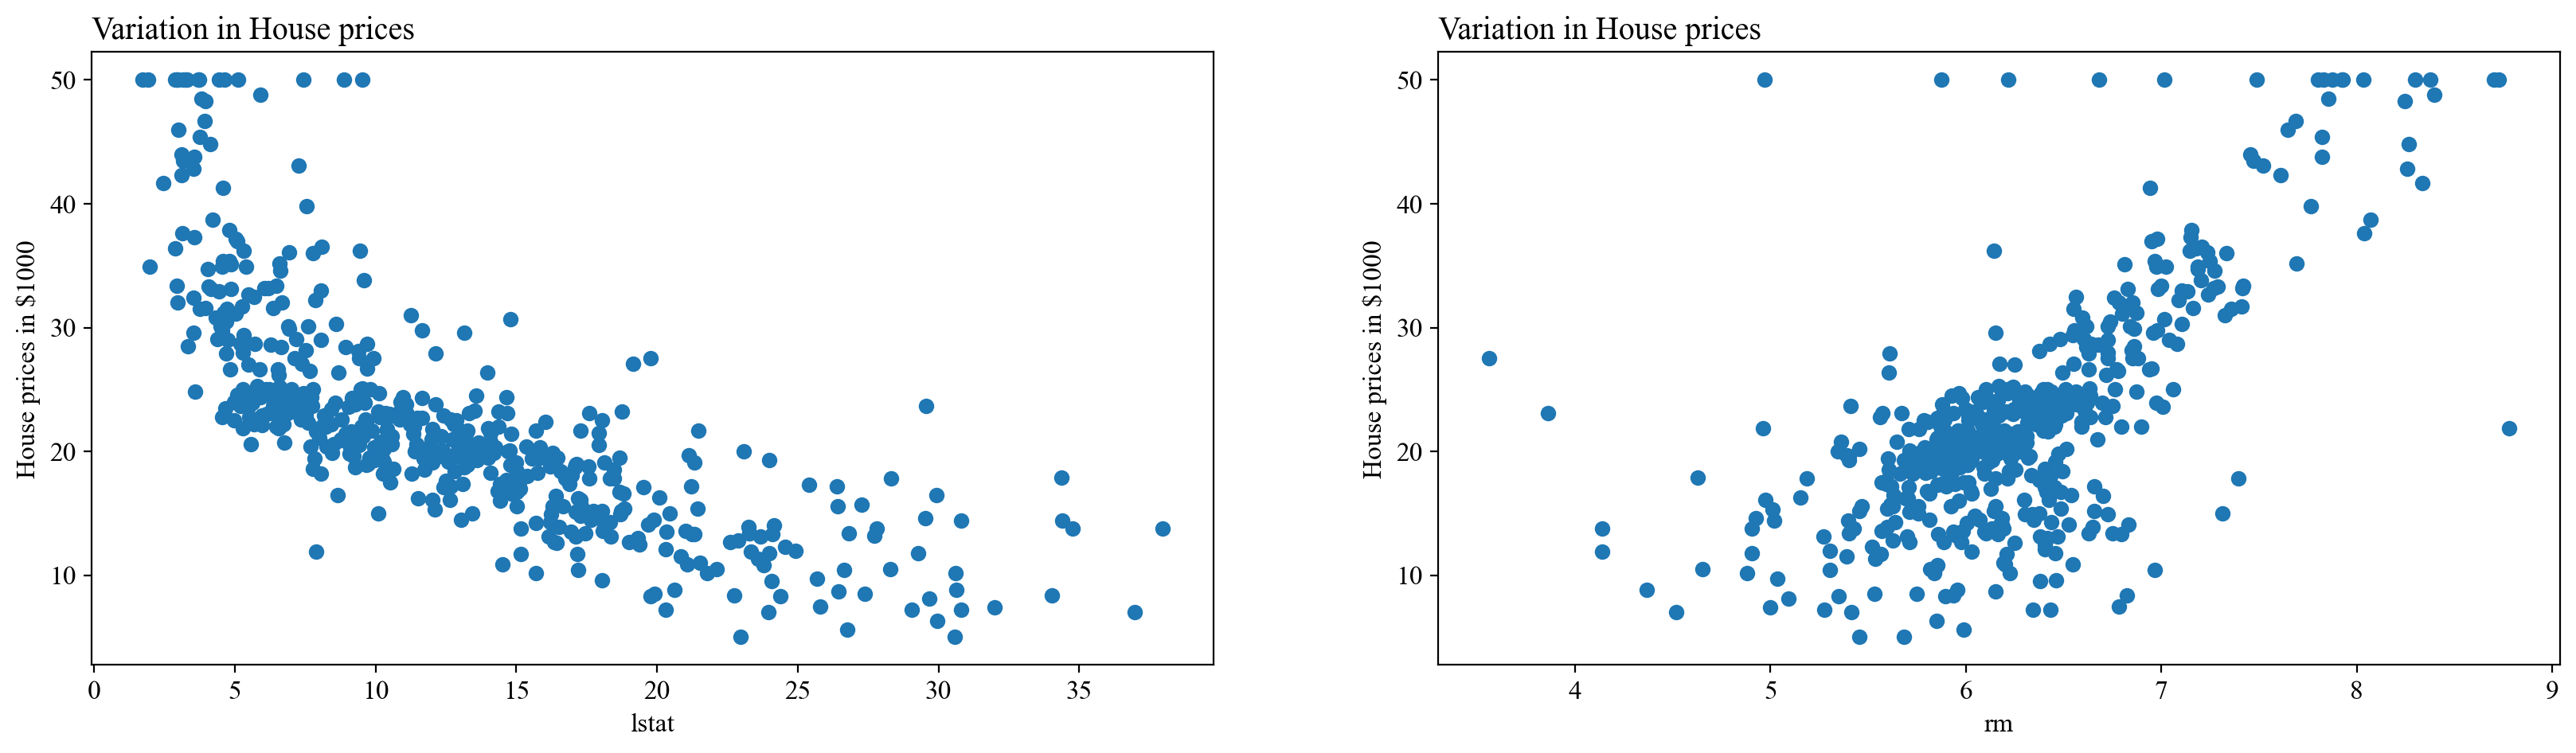

In [11]:
from matplotlib import rcParams

plt.figure(figsize=(20, 5),dpi=200)

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices",loc="Left")
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')

In [12]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# fig = make_subplots(
# rows=1, cols=2
# # subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
# )

# fig.add_trace(
#     go.Scatter(x=boston["lstat"],y=boston['medv'],mode='markers',
#     marker=dict(
#             color="#003366"),
#         line=dict(color="#003366",width=1)),
#     row=1, col=1
# )

# fig.add_trace(
#     go.Scatter(x=boston['rm'],y=boston['medv'],mode='markers',
#     marker=dict(
#             color="#FF6600"),
#         line=dict(color="#FF6600",width=1)),
#     row=1, col=2
# )

# # Update xaxis properties
# fig.update_xaxes(title_text="Lower State Population (%)", row=1, col=1)
# fig.update_xaxes(title_text="Number of Rooms", row=1, col=2)

# # Update yaxis properties
# fig.update_yaxes(title_text="House Prices ($1000)", row=1, col=1)
# # fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
# # Update title and height
# fig.update_layout(height=600, width=1400, title_text="Variation in Housing Prices")
# output_file="app/static/baseimage.svg"
# fig.write_image(output_file,width=1200,engine="kaleido")
# fig.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [14]:
# Apply Linear Regression Model as Base Model
lr = LinearRegression()
pred_lr = lr.fit(X_train, y_train).predict(X_test)

# Checking Model Metrics
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(y_test, pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 Score:  0.6628487561645711
RMSE:  6.341595223261508


In [15]:
# Get a List of Models as Base Models
def base_models():
  models = dict()
  models['lr'] = LinearRegression()
  models["Ridge"] = Ridge()
  models["Lasso"] = Lasso()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
  models["GBM"] = GradientBoostingRegressor()
  models["XGB"] = XGBRegressor()
  models["LightGBM"] = LGBMRegressor()
  return models

In [16]:
# Now we will apply K Fold Cross Validation. We will now create a evaluate function with Repeated Stratified K Fold
# And Capture the Cross Val Score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, df_X, df_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [17]:
# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>lr 3.391 (0.530)
>Ridge 3.382 (0.519)
>Lasso 3.711 (0.549)
>Tree 2.890 (0.455)
>Random Forest 2.199 (0.358)
>Bagging 2.312 (0.407)
>GBM 2.086 (0.277)
>XGB 2.169 (0.308)
>LightGBM 2.172 (0.400)


In [18]:
regressmod = pd.DataFrame(np.transpose(results), columns = ["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM", "XGB","LightGBM"])
regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM", "XGB","LightGBM"])
regressmod.head()

,index,variable,value
0,0,lr,3.745638
1,1,lr,3.691066
2,2,lr,2.304415
3,3,lr,4.416883
4,4,lr,2.700048


In [19]:
fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()
# fig.write_image("app/static/Boxplot.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)


In [20]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  # level0.append(('Tree', DecisionTreeRegressor()))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('XGB', XGBRegressor()))
  level0.append(('Bagging', BaggingRegressor()))
	# define meta learner model
  level1 = LGBMRegressor()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [21]:
def base_models():
  models = dict()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
  models["XGB"] = XGBRegressor()
  models["Stacked Model"] = get_stacking()
  return models

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, df_X, df_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [22]:
# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

regressmod = pd.DataFrame(np.transpose(results), columns = ["Tree","Random Forest","Bagging","XGB","Stacked Reg"])
regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=["Tree","Random Forest","Bagging","XGB","Stacked Reg"])
fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()
# fig.write_image("app/static/Boxplot_candidate.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
# fig.show()

>Tree 2.881 (0.513)
>Random Forest 2.189 (0.350)
>Bagging 2.293 (0.326)
>XGB 2.169 (0.308)
>Stacked Model 2.706 (0.357)


In [23]:
from joblib import dump, load
dump(models, "stacked-models.joblib")

['stacked-models.joblib']

In [24]:
X_test.iloc[9]

crim         0.07978
zn          40.00000
indus        6.41000
chas         0.00000
nox          0.44700
rm           6.48200
age         32.10000
dis          4.14030
rad          4.00000
tax        254.00000
ptratio     17.60000
b          396.90000
lstat        7.19000
Name: 278, dtype: float64

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

level0 = list()
level0.append(('Tree', DecisionTreeRegressor()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('GBM', GradientBoostingRegressor()))
level0.append(('Bagging', BaggingRegressor()))
level0.append(("XGB", XGBRegressor()))

level1 = LGBMRegressor()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 430, number of used features: 5
[LightGBM] [Info] Start training from score 22.226977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

StackingRegressor(cv=10,
                  estimators=[('Tree', DecisionTreeRegressor()),
                              ('RF', RandomForestRegressor()),
                              ('GBM', GradientBoostingRegressor()),
                              ('Bagging', BaggingRegressor()),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_catego...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=LGBMRegressor())

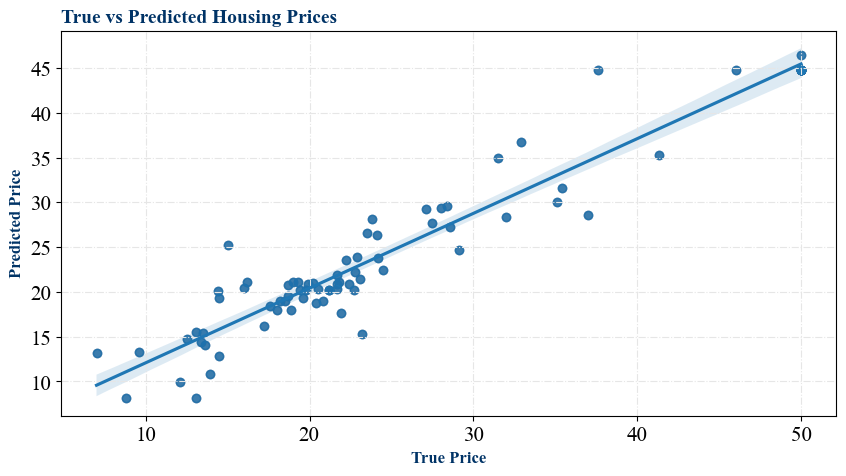

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

y_pred = model.predict(X_test)
pricecompare = pd.DataFrame({"Actual Price":y_test, "Predicted Price":y_pred})
plt.scatter(y_test,y_pred, color='#003366',alpha=0.6)
ax = sns.regplot(x="Actual Price", y="Predicted Price", data=pricecompare, scatter_kws={'alpha':0.6})
plt.title("True vs Predicted Housing Prices", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("True Price", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Predicted Price", fontsize=12,fontweight='bold',color='#003366')
plt.savefig('app/static/Price_prediction.jpg',dpi=300)
plt.show()

In [27]:
import joblib
import pickle

# Save to file in the current working directory
pkl_filename = "app/TrainedModel/StackedPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

joblib.dump(model, './app/TrainedModel/stacked_models.joblib')


['./app/TrainedModel/stacked_models.joblib']

In [28]:
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 89.86 %


In [29]:
# boston.iloc[1]
np.set_printoptions(suppress=True)
print(boston.iloc[9])
print(boston.iloc[9].values.reshape(1, -1))
print(boston.iloc[9].values.reshape(1, -1)[0])

crim         0.17004
zn          12.50000
indus        7.87000
chas         0.00000
nox          0.52400
rm           6.00400
age         85.90000
dis          6.59210
rad          5.00000
tax        311.00000
ptratio     15.20000
b          386.71000
lstat       17.10000
medv        18.90000
Name: 9, dtype: float64
[[  0.17004  12.5       7.87      0.        0.524     6.004    85.9
    6.5921    5.      311.       15.2     386.71     17.1      18.9    ]]
[  0.17004  12.5       7.87      0.        0.524     6.004    85.9
   6.5921    5.      311.       15.2     386.71     17.1      18.9    ]


In [30]:
def hello_world():
    pkl_filename = "app/TrainedModel/StackedPickle.pkl"
    testvalue = df_X.iloc[9].values.reshape(1, -1)
    test_input = testvalue
    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
    predict = pickle_model.predict(test_input)
    predict_as_str = str(predict)
    return predict_as_str

hello_world()

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but BaggingRegressor was fitted with feature names



'[21.55747652]'

In [31]:
import joblib

def hello_world():
    # Path to the joblib file
    joblib_filename = "./app/TrainedModel/stacked_models.joblib"

    # Get the feature names
    feature_names = df_X.columns

    # Selecting a single row for prediction while keeping the column names
    test_row = df_X.iloc[9]

    # Creating a DataFrame from the selected row with the same feature names
    test_value_df = pd.DataFrame([test_row.values], columns=feature_names)

    # Load the model
    model = joblib.load(joblib_filename)
    # print(model.keys())
    # Make a prediction using the DataFrame with column names
    prediction = model.predict(test_value_df)

    # Convert the prediction to a string (if necessary)
    prediction_as_str = str(prediction)

    return prediction_as_str

# Example usage
print(hello_world())

AttributeError: 'StackingRegressor' object has no attribute 'keys'

In [33]:
import os
import secrets
import hashlib

def generate_secret_key(*keywords):
    random_string = secrets.token_hex(16)
    keyword_string = '-'.join(keywords)
    raw_key = f"{keyword_string}-{random_string}"

    # Use SHA-256 hash to get a fixed size key
    return hashlib.sha256(raw_key.encode()).hexdigest()

# Usage
keywords = ('humped', 'forest', 'amok')
secret_key = generate_secret_key(*keywords)

# Define the path to the .env file
env_file_path = os.path.join('.', 'app', '.env')

# Write the secret key to the .env file
with open(env_file_path, 'w') as env_file:
    env_file.write(f'SECRET_KEY={secret_key}\n')

print(f'Secret key saved to {env_file_path}')


Secret key saved to .\app\.env


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

level0 = list()
level0.append(('Tree', DecisionTreeRegressor()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('GBM', GradientBoostingRegressor()))
level0.append(('Bagging', BaggingRegressor()))
level0.append(("XGB", XGBRegressor()))

level1 = LGBMRegressor()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
model.fit(X_train, y_train)

def plot_graphs(model,new_input_arr, output_file):
    boston = pd.read_csv("./app/TrainedModel/BostonHousing.csv")
    df_X = boston.drop(['medv'], axis=1)
    df_y = boston['medv']

    fig = make_subplots(
    rows=1, cols=2
    # subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
    )

    fig.add_trace(
        go.Scatter(x=boston["lstat"],y=boston['medv'],mode='markers',
        marker=dict(
                color="#003366"),
            line=dict(color="#003366",width=1)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=boston['rm'],y=boston['medv'],mode='markers',
        marker=dict(
                color="#FF6600"),
            line=dict(color="#FF6600",width=1)),
        row=1, col=2
    )

    new_preds = model.predict(new_input_arr)
    # print(new_preds)
    RM_input = np.array(new_input_arr[0][5])
    # print(RM_input)
    LSTAT_input =np.array(new_input_arr[0][12])
    # print(LSTAT_input)

    fig.add_trace(
    go.Scatter(
        x=LSTAT_input,
        y=new_preds,
        mode='markers', name="Predicted Output",
        marker=dict(
            color="#FFCC00",size=15),
        line=dict(color="#FFCC00",width=1)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=RM_input,
            y=new_preds,
            mode='markers', name="Predicted Output",
            marker=dict(
                color="#6600cc",size=15),
            line=dict(color="red",width=1)),
            row=1, col=2
    )

    # Update xaxis properties
    fig.update_xaxes(title_text="Lower State Population (%)", row=1, col=1)
    fig.update_xaxes(title_text="Number of Rooms", row=1, col=2)

    # Update yaxis properties
    fig.update_yaxes(title_text="House Prices ($1000)", row=1, col=1)
    # fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
    # Update title and height
    fig.update_layout(height=600, width=1400, title_text="Variation in Housing Prices")
    output_file="app/static/scatterplot.svg"
    fig.write_image(output_file,width=1200,engine="kaleido")
    fig.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 430, number of used features: 5
[LightGBM] [Info] Start training from score 21.896279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
boston = pd.read_csv("./app/TrainedModel/BostonHousing.csv")
df_X = boston.drop(['medv'], axis=1)
df_y = boston['medv']
testvalue = df_X.iloc[9].values.reshape(1, -1)
plot_graphs(model,new_input_arr=testvalue,output_file="app/static/scatterplot.svg")

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

d:\Repositories\flask-app-for-class\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but BaggingRegressor was fitted with feature names



: 

In [ ]:
def floatsome_to_np_array(floats_str):
  def is_float(s):
    try:
      float(s)
      return True
    except:
      return False
  floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
  return floats.reshape(len(floats), 1)

floatsome_to_np_array("1, 222, 3, 6, 4, ")

In [ ]:
floatsome_to_np_array("1, 222, 3, 6, 4, ").reshape(1, -1)